In [2]:
import pandas as pd
import numpy as np

dataset : https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [3]:
dataset = pd.read_csv("mnist_train.csv")

In [4]:
dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dataset.shape

(60000, 785)

In [10]:
X = dataset.iloc[:,1:]
Y= dataset.iloc[:,:1]

In [11]:
X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Y=Y.values.ravel()
Y

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,))

In [38]:
set(Y)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

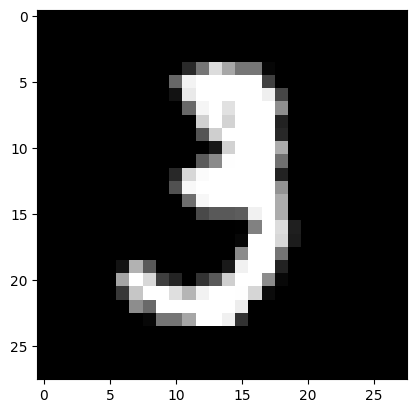

(784,)

In [16]:
n=10

import matplotlib.pyplot as plt
sample = X.iloc[n].values.reshape(28,28)
plt.imshow(sample,cmap="gray")
plt.show()
Y[n]
X.iloc[n].shape

In [17]:
from sklearn import svm

In [18]:
model = svm.SVC(kernel='rbf')

In [19]:
model.fit(X,Y)

SVC()

In [20]:
from sklearn.metrics import classification_report , confusion_matrix

test = pd.read_csv("mnist_test.csv")

X_test = test.iloc[:,1:]
Y_test= test.iloc[:,:1]


y_=model.predict(X_test)


report=classification_report(Y_test,y_)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [21]:

confusion_matrix(Y_test,y_)

array([[ 973,    0,    1,    0,    0,    2,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1006,    2,    1,    0,    2,    7,    6,    1],
       [   0,    0,    2,  995,    0,    2,    0,    5,    5,    1],
       [   0,    0,    5,    0,  961,    0,    3,    0,    2,   11],
       [   2,    0,    0,    9,    0,  871,    4,    1,    4,    1],
       [   6,    2,    0,    0,    2,    3,  944,    0,    1,    0],
       [   0,    6,   11,    1,    1,    0,    0,  996,    2,   11],
       [   3,    0,    2,    6,    3,    2,    2,    3,  950,    3],
       [   3,    4,    1,    7,   10,    2,    1,    7,    4,  970]])

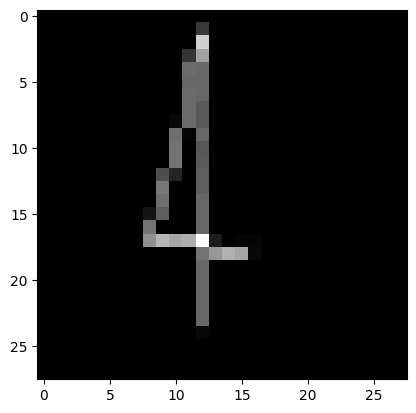

In [34]:
import cv2
img = cv2.imread("test.png", cv2.IMREAD_GRAYSCALE)
img = 255 - img  
img =cv2.resize(img,(28,28),interpolation=cv2.INTER_AREA)
plt.imshow(img,cmap="gray")
plt.show()


In [35]:
img=img.flatten()
img = img.reshape(1, -1) 

In [36]:

model.predict(img)

c:\Users\Sina's Pc\Desktop\Handwritten-Digit-Classifier-MNIST\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5])